# WeatherPy
----

### Analysis
##### Wendy Chau

* Strangely, around 60°N the temperature of sampled cities seems to follow two trendlines; there is a noticeable cluster that recorded higher temperature than others on the same latitude. Since max temperature is a measure of the highest recorded temperature of the day of analysis, cities that are located in different western/eastern hemispheres might have different data due to time zone differences.  This results in cities with as much of the day already over (with its daily max temperature already recorded) being pitted against cities whose days have just begun (and still haven't warmed up due to lack of sunlight).
* Humidity seems to be the highest closest to the equator.  There is a bell curve shape on the scatterplot, with lows of around 80% humidity at the equator (0° latitude) whereas there are several cities with 0% humidity at 60°N and around 30% humidity around 30°S.
* Temperatures from the southern hemisphere (which is currently experiecing summer) are compareble to to those of the equator while the northern hemisphere (currently winter) is noticebly colder.  Even so, there is still a slight trend of increasing temperature from the south towards the equator.  Temperatures appear to start dropping after 10°N (rather than at exactly 0°).

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
# NOTE - file not uploaded with rest of hw - please use your own API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [3]:
# List for holding latitude/longitude and city names
lat_lngs = []
cities = []

# Dataset is fleshed out by sampling different latitude/longitude, to account for all hemispheres
coordinate_range = pd.DataFrame({
    "lat_low": [-90, -90, 0, 0],
    "lat_high": [0, 0, 90, 90],
    "lng_low": [-180, 0, -180, 0],
    "lng_high": [0, 180, 0, 180]})

# Identify nearest city for each latitude/longitude combination
for x in range(0,4):
    
    lats = np.random.uniform(low=coordinate_range.loc[x, 'lat_low'], high=coordinate_range.loc[x, 'lat_high'], size=350)
    lngs = np.random.uniform(low=coordinate_range.loc[x, 'lng_low'], high=coordinate_range.loc[x, 'lng_high'], size=350)
    lat_lngs = zip(lats, lngs)

    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        if city not in cities:
            cities.append(city)
            
# Check sample size        
print(f"sample size: {len(cities)} cities")

sample size: 566 cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Lists to hold results

cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    print(f"Processing dataset {cities.index(city)+1} of {len(cities)} - {city}")
    
    # Retrieve data for various categories
    try:
        cloudiness.append(weather_json["clouds"]["all"])
    except (KeyError, IndexError):
        print(f"- missing data for {city} - cloudiness")
        cloudiness.append(None)
        
    try:
        country.append(weather_json["sys"]["country"])
    except (KeyError, IndexError):
        print(f"- missing data for {city} - country")
        country.append(None)

    try:
        date.append(weather_json["dt"])
    except (KeyError, IndexError):
        print(f"- missing data for {city} - date")
        date.append(None) 

    try:
        humidity.append(weather_json["main"]["humidity"])
    except (KeyError, IndexError):
        print(f"- missing data for {city} - humidity")
        humidity.append(None)
        
    try:
        latitude.append(weather_json["coord"]["lat"])
    except (KeyError, IndexError):
        print(f"- missing data for {city} - latitude")
        latitude.append(None)
        
    try:
        longitude.append(weather_json["coord"]["lon"])
    except (KeyError, IndexError):
        print(f"- missing data for {city} - longitude")
        longitude.append(None)
        
    try:
        max_temp.append(weather_json["main"]["temp_max"])
    except (KeyError, IndexError):
        print(f"- missing data for {city} - maximum temperature")
        max_temp.append(None)
        
    try:
        wind_speed.append(weather_json["wind"]["speed"])
    except (KeyError, IndexError):
        print(f"- missing data for {city} - wind speed")
        wind_speed.append(None)
        
            
print("-----------------------------")
print("Data Retrieval Finished") 

Beginning Data Retrieval
-----------------------------
Processing dataset 1 of 566 - chuy
Processing dataset 2 of 566 - ushuaia
Processing dataset 3 of 566 - rikitea
Processing dataset 4 of 566 - punta arenas
Processing dataset 5 of 566 - mataura
Processing dataset 6 of 566 - mar del plata
Processing dataset 7 of 566 - ipira
Processing dataset 8 of 566 - coihaique
Processing dataset 9 of 566 - puerto ayora
Processing dataset 10 of 566 - avarua
Processing dataset 11 of 566 - castro
Processing dataset 12 of 566 - georgetown
Processing dataset 13 of 566 - maragogi
Processing dataset 14 of 566 - hermanus
Processing dataset 15 of 566 - lebu
Processing dataset 16 of 566 - takoradi
Processing dataset 17 of 566 - calama
Processing dataset 18 of 566 - vila velha
Processing dataset 19 of 566 - arraial do cabo
Processing dataset 20 of 566 - samusu
- missing data for samusu - cloudiness
- missing data for samusu - country
- missing data for samusu - date
- missing data for samusu - humidity
- miss

Processing dataset 111 of 566 - lucapa
Processing dataset 112 of 566 - flinders
Processing dataset 113 of 566 - port alfred
Processing dataset 114 of 566 - tuatapere
Processing dataset 115 of 566 - malanje
Processing dataset 116 of 566 - port elizabeth
Processing dataset 117 of 566 - portland
Processing dataset 118 of 566 - geraldton
Processing dataset 119 of 566 - manokwari
Processing dataset 120 of 566 - asau
- missing data for asau - cloudiness
- missing data for asau - country
- missing data for asau - date
- missing data for asau - humidity
- missing data for asau - latitude
- missing data for asau - longitude
- missing data for asau - maximum temperature
- missing data for asau - wind speed
Processing dataset 121 of 566 - lorengau
Processing dataset 122 of 566 - port hedland
Processing dataset 123 of 566 - carnarvon
Processing dataset 124 of 566 - ulladulla
Processing dataset 125 of 566 - cooma
Processing dataset 126 of 566 - luderitz
Processing dataset 127 of 566 - esperance
Pro

Processing dataset 231 of 566 - lavrentiya
Processing dataset 232 of 566 - kodiak
Processing dataset 233 of 566 - acapulco
Processing dataset 234 of 566 - whitehorse
Processing dataset 235 of 566 - yarmouth
Processing dataset 236 of 566 - bathsheba
Processing dataset 237 of 566 - la sarre
Processing dataset 238 of 566 - ponta do sol
Processing dataset 239 of 566 - barrow
Processing dataset 240 of 566 - muros
Processing dataset 241 of 566 - illoqqortoormiut
- missing data for illoqqortoormiut - cloudiness
- missing data for illoqqortoormiut - country
- missing data for illoqqortoormiut - date
- missing data for illoqqortoormiut - humidity
- missing data for illoqqortoormiut - latitude
- missing data for illoqqortoormiut - longitude
- missing data for illoqqortoormiut - maximum temperature
- missing data for illoqqortoormiut - wind speed
Processing dataset 242 of 566 - san quintin
Processing dataset 243 of 566 - nome
Processing dataset 244 of 566 - qaanaaq
Processing dataset 245 of 566 -

Processing dataset 344 of 566 - raymond
Processing dataset 345 of 566 - la ronge
Processing dataset 346 of 566 - palmer
Processing dataset 347 of 566 - nizhneyansk
- missing data for nizhneyansk - cloudiness
- missing data for nizhneyansk - country
- missing data for nizhneyansk - date
- missing data for nizhneyansk - humidity
- missing data for nizhneyansk - latitude
- missing data for nizhneyansk - longitude
- missing data for nizhneyansk - maximum temperature
- missing data for nizhneyansk - wind speed
Processing dataset 348 of 566 - airai
Processing dataset 349 of 566 - atyrau
Processing dataset 350 of 566 - qui nhon
- missing data for qui nhon - cloudiness
- missing data for qui nhon - country
- missing data for qui nhon - date
- missing data for qui nhon - humidity
- missing data for qui nhon - latitude
- missing data for qui nhon - longitude
- missing data for qui nhon - maximum temperature
- missing data for qui nhon - wind speed
Processing dataset 351 of 566 - belushya guba
- 

Processing dataset 423 of 566 - karamay
- missing data for karamay - cloudiness
- missing data for karamay - country
- missing data for karamay - date
- missing data for karamay - humidity
- missing data for karamay - latitude
- missing data for karamay - longitude
- missing data for karamay - maximum temperature
- missing data for karamay - wind speed
Processing dataset 424 of 566 - malpe
Processing dataset 425 of 566 - paracelis
Processing dataset 426 of 566 - ankang
Processing dataset 427 of 566 - crotone
Processing dataset 428 of 566 - bilma
Processing dataset 429 of 566 - khatanga
Processing dataset 430 of 566 - port blair
Processing dataset 431 of 566 - ostrovnoy
Processing dataset 432 of 566 - ekhabi
Processing dataset 433 of 566 - horni plana
Processing dataset 434 of 566 - orsha
Processing dataset 435 of 566 - noshiro
Processing dataset 436 of 566 - podbelsk
- missing data for podbelsk - cloudiness
- missing data for podbelsk - country
- missing data for podbelsk - date
- miss

Processing dataset 524 of 566 - balad
Processing dataset 525 of 566 - karpogory
Processing dataset 526 of 566 - vikhorevka
Processing dataset 527 of 566 - sheopur
Processing dataset 528 of 566 - sibu
Processing dataset 529 of 566 - mglin
Processing dataset 530 of 566 - talaya
Processing dataset 531 of 566 - bogo
Processing dataset 532 of 566 - mishan
Processing dataset 533 of 566 - eyl
Processing dataset 534 of 566 - baykit
Processing dataset 535 of 566 - hasaki
Processing dataset 536 of 566 - svetlyy
- missing data for svetlyy - cloudiness
- missing data for svetlyy - country
- missing data for svetlyy - date
- missing data for svetlyy - humidity
- missing data for svetlyy - latitude
- missing data for svetlyy - longitude
- missing data for svetlyy - maximum temperature
- missing data for svetlyy - wind speed
Processing dataset 537 of 566 - talaja
Processing dataset 538 of 566 - arbon
Processing dataset 539 of 566 - batagay-alyta
Processing dataset 540 of 566 - mae ramat
Processing da

### Convert Raw Data to DataFrame
* Export the city data into a .csv
* Display the DataFrame

In [5]:
# Dataframe from various lists of data

weather_data = pd.DataFrame({
    "City": cities,
    "Cloudiness" : cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,chuy,24.0,UY,1.549255e+09,87.0,-33.69,-53.46,63.53,6.51
1,ushuaia,0.0,AR,1.549253e+09,58.0,-54.81,-68.31,59.00,10.29
2,rikitea,12.0,PF,1.549255e+09,99.0,-23.12,-134.97,81.85,7.74
3,punta arenas,0.0,CL,1.549253e+09,59.0,-53.16,-70.91,60.80,8.05
4,mataura,88.0,NZ,1.549255e+09,53.0,-46.19,168.86,71.18,21.83


In [6]:
# Export results to CSV file
weather_data.to_csv("output_data/cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs

In [7]:
# Pull accurate unix timestamp based on compiled dates (which is presumably slightly variable due to time zones)

import datetime

date_of_analysis = weather_data["Date"].mode()

date_from_unix = datetime.datetime.fromtimestamp(date_of_analysis)

date_reformatted = date_from_unix.strftime('%m/%d/%y')

print(f"date of analysis: {date_reformatted}")

date of analysis: 02/03/19


#### Latitude vs. Temperature Plot

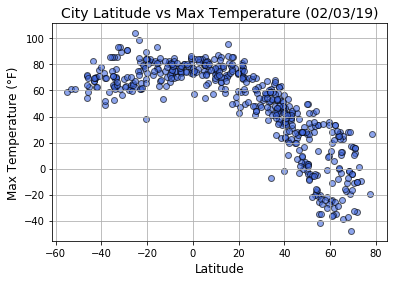

In [9]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"],
            marker="o", facecolors="royalblue", edgecolors="black", alpha=0.6)

plt.title(f"City Latitude vs Max Temperature ({date_reformatted})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°F)", fontsize=12)
plt.grid()

plt.savefig("output_data/city_lat_vs_max_temp.png")

plt.show()

#### Latitude vs. Humidity Plot

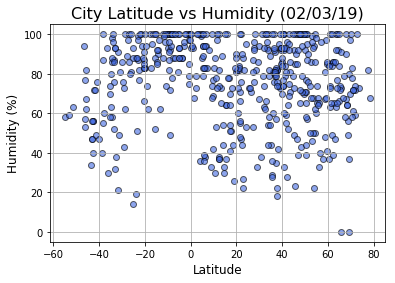

In [15]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"],
            marker="o", facecolors="royalblue", edgecolors="black", alpha=0.6)

plt.title(f"City Latitude vs Humidity ({date_reformatted})", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid()

plt.savefig("output_data/city_lat_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

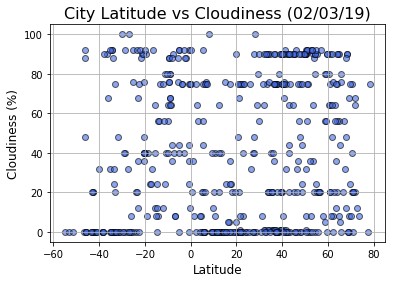

In [14]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o",
            facecolors="royalblue", edgecolors="black", alpha=0.6)

plt.title(f"City Latitude vs Cloudiness ({date_reformatted})", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid()

plt.savefig("output_data/city_lat_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

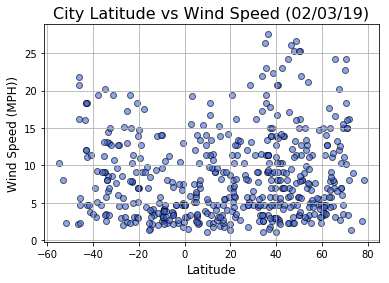

In [13]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o",
            facecolors="royalblue", edgecolors="black", alpha=0.6)

plt.title(f"City Latitude vs Wind Speed ({date_reformatted})", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (MPH))", fontsize=12)
plt.grid()

plt.savefig("output_data/city_lat_vs_wind_speed.png")

plt.show()